In [ ]:
import os

path = "./data/django-ocpp-logs"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' ./data/django-ocpp-logs ' :
['django.log.2023-09-24.006', 'django.log', 'django.log.2023-09-23.012', 'django.log.2023-09-23.014', 'django.log.2023-09-23.030', 'django.log.2023-09-23.013', 'django.log.2023-09-23.015', 'django.log.2023-09-23.016', 'django.log.2023-09-23.017', 'django.log.2023-09-23.018', 'django.log.2023-09-23.019', 'django.log.2023-09-23.020', 'django.log.2023-09-23.021', 'django.log.2023-09-23.022', 'django.log.2023-09-23.023', 'django.log.2023-09-23.024', 'django.log.2023-09-23.025', 'django.log.2023-09-23.026', 'django.log.2023-09-23.027', 'django.log.2023-09-23.028', 'django.log.2023-09-23.029', 'django.log.2023-09-23.031', 'django.log.2023-09-23.032', 'django.log.2023-09-23.033', 'django.log.2023-09-23.034', 'django.log.2023-09-23.035', 'django.log.2023-09-23.036', 'django.log.2023-09-23.037', 'django.log.2023-09-23.038', 'django.log.2023-09-23.039', 'django.log.2023-09-24.001', 'django.log.2023-09-24.002', 'django.log.2023-09-24.003', 'd

In [2]:
len(dir_list)

366

In [3]:
ip = "212.205.147.23"
print(ip)

f = open("./data/cleaned-ocpp-logs/log1.log", "w")

for log_file in dir_list:
  log_file_path = path + "/" + log_file
  with open(log_file_path, encoding='utf8') as fp:
    line = fp.readline()
    cnt = 1
    while line:
      line = fp.readline()
      if ip in line:
        f.write(line.strip())
        f.write('\n')

f.close()  

212.205.147.23


do some manula cleaning

In [4]:
f = open("./data/cleaned-ocpp-logs/log2.log", "w")

with open("./data/cleaned-ocpp-logs/log1.log", encoding='utf8') as fp:
  line = fp.readline()
  cnt = 1
  while line:
    line = fp.readline()
    if "OCPP v1.6" in line:
      f.write(line.strip())
      f.write('\n')

f.close()  

In [5]:
line_example = "INFO 2023-09-24 03:13:17,935 OCPPConsumer 1 139913169582976 IP 212.205.147.23 OCPP v1.6 HeartBeat charging_point: fdbfd1d0-7d7f-4faa-95eb-804105571897 request: [2, '888b7fdf-dd67-443b-825f-5755426b4a50', 'Heartbeat', {}]"
l1 = line_example.split("[")
l2 = l1[0].split(" ")
l2

['INFO',
 '2023-09-24',
 '03:13:17,935',
 'OCPPConsumer',
 '1',
 '139913169582976',
 'IP',
 '212.205.147.23',
 'OCPP',
 'v1.6',
 'HeartBeat',
 'charging_point:',
 'fdbfd1d0-7d7f-4faa-95eb-804105571897',
 'request:',
 '']

In [6]:
datetime_example = l2[1]+"T"+l2[2]
datetime_example = datetime_example.replace(",", ".")

In [7]:
from datetime import datetime

datetime.fromisoformat(datetime_example)

datetime.datetime(2023, 9, 24, 3, 13, 17, 935000)

In [8]:
# Analyze logs
start_txs_num = 0
stop_txs_num = 0
remote_start_txs_num = 0
remote_stop_txs_num = 0
faulted_msgs = 0

with open("./data/cleaned-ocpp-logs/log2.log", encoding='utf8') as fp:
  line = fp.readline()
  cnt = 1
  while line:
    line = fp.readline()
    
    if "StartTransaction" in line:
      start_txs_num += 1

    if "StopTransaction" in line:
      stop_txs_num += 1

    if "RemoteStartTransaction" in line:
      remote_start_txs_num += 1

    if "RemoteStopTransaction" in line:
      remote_stop_txs_num += 1

    if "Faulted" in line:
      faulted_msgs += 1

      

print("StartTransaction messages:", start_txs_num)
print("StopTransaction messages:", stop_txs_num)
print("RemoteStartTransaction messages:", remote_start_txs_num)
print("RemoteStopTransaction messages:", remote_stop_txs_num)
print("Faulted messages:", faulted_msgs)

StartTransaction messages: 318
StopTransaction messages: 271
RemoteStartTransaction messages: 192
RemoteStopTransaction messages: 144
Faulted messages: 4


In [9]:
import pandas as pd

timestamps = []

with open("./data/cleaned-ocpp-logs/log2.log", encoding='utf8') as fp:
  line = fp.readline()
  cnt = 1
  while line:
    line = fp.readline()
    
    if "Heartbeat" in line:
      l1 = line.split("[")
      l2 = l1[0].split(" ")
      timestamp = l2[1]+"T"+l2[2]
      timestamp = timestamp.replace(",", ".")
      timestamps.append(datetime.fromisoformat(timestamp))

ts = pd.Series(timestamps)
ts

0        2023-09-24 03:13:18.364
1        2023-09-24 03:13:20.624
2        2023-09-24 03:13:22.330
3        2023-09-24 03:13:22.685
4        2023-09-24 03:13:23.062
                   ...          
108826   2023-10-02 14:58:21.241
108827   2023-10-02 14:58:40.029
108828   2023-10-02 14:58:46.370
108829   2023-10-02 14:58:52.900
108830   2023-10-02 14:58:54.290
Length: 108831, dtype: datetime64[ns]

In [10]:
import numpy as np

ts = pd.Series(np.ones(len(timestamps)), index=timestamps)
ts

2023-09-24 03:13:18.364    1.0
2023-09-24 03:13:20.624    1.0
2023-09-24 03:13:22.330    1.0
2023-09-24 03:13:22.685    1.0
2023-09-24 03:13:23.062    1.0
                          ... 
2023-10-02 14:58:21.241    1.0
2023-10-02 14:58:40.029    1.0
2023-10-02 14:58:46.370    1.0
2023-10-02 14:58:52.900    1.0
2023-10-02 14:58:54.290    1.0
Length: 108831, dtype: float64

In [11]:
heartbeats_1min_range = ts.resample("1Min").sum()
heartbeats_1min_range

2023-09-23 06:43:00     8.0
2023-09-23 06:44:00    12.0
2023-09-23 06:45:00    12.0
2023-09-23 06:46:00    12.0
2023-09-23 06:47:00    12.0
                       ... 
2023-10-02 15:14:00    12.0
2023-10-02 15:15:00    12.0
2023-10-02 15:16:00    12.0
2023-10-02 15:17:00    12.0
2023-10-02 15:18:00    12.0
Freq: T, Length: 13476, dtype: float64

<Axes: >

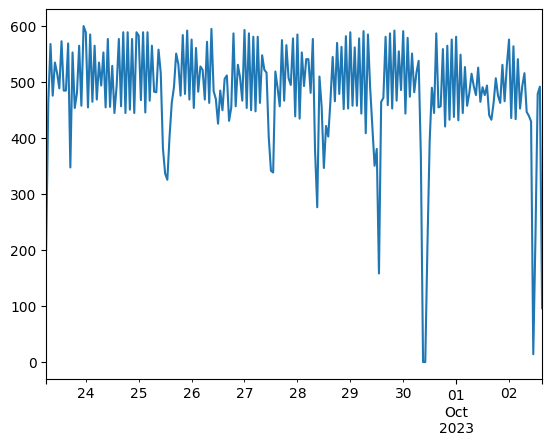

In [12]:
heartbeats_1hr_range = ts.resample("1H").sum()
heartbeats_1hr_range.plot()

<Axes: >

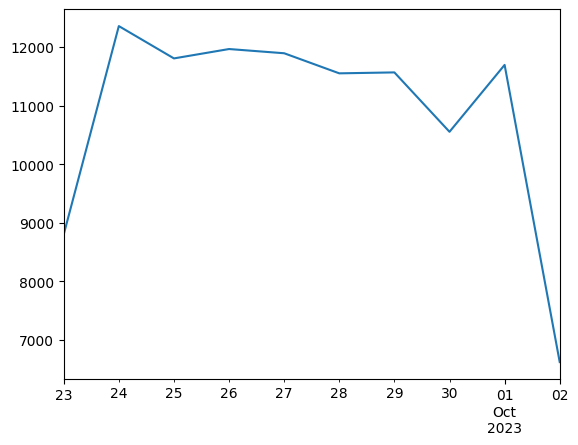

In [13]:
heartbeats_1d_range = ts.resample("1D").sum()
heartbeats_1d_range.plot()

<Axes: >

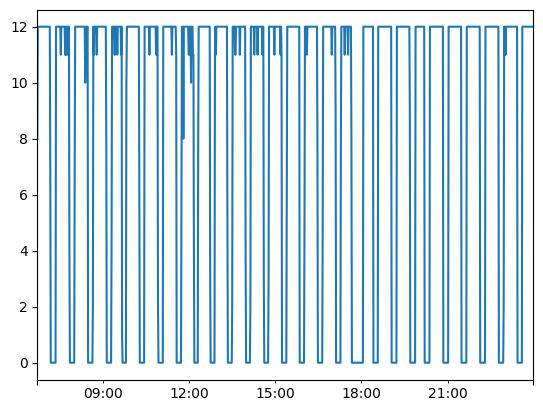

In [14]:
heartbeats_1min_range.loc['2023-09-23T00:00:00.000':'2023-09-23T23:59:59.000'].plot()

<Axes: >

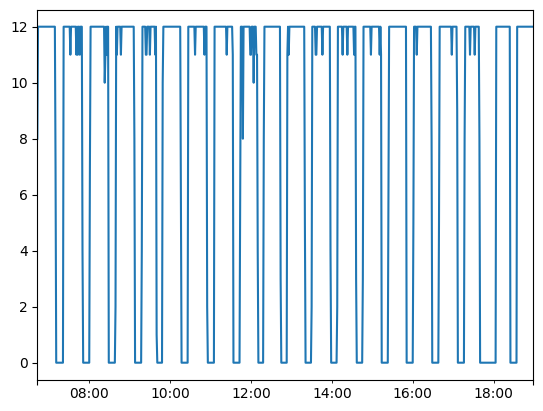

In [15]:
heartbeats_1min_range.loc['2023-09-23T00:00:00.000':'2023-09-23T18:59:59.000'].plot()

<Axes: >

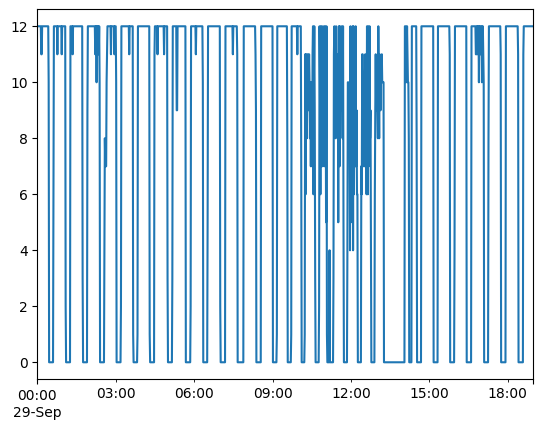

In [16]:
# friday working day
heartbeats_1min_range.loc['2023-09-29T00:00:00.000':'2023-09-29T18:59:59.000'].plot()

<Axes: >

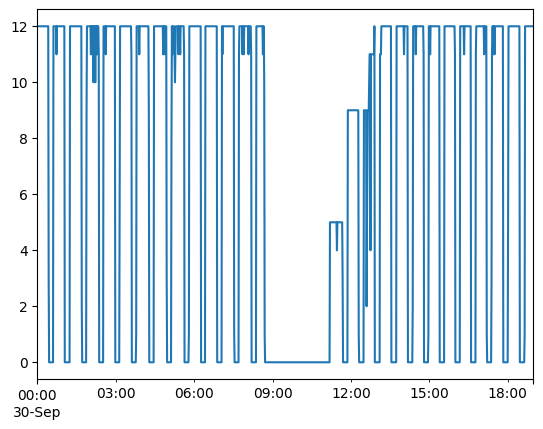

In [17]:
# parking site reconfiguration by electrician
heartbeats_1min_range.loc['2023-09-30T00:00:00.000':'2023-09-30T18:59:59.000'].plot()

<Axes: >

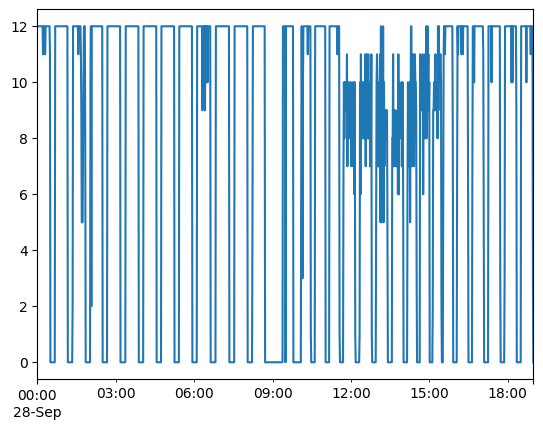

In [18]:
heartbeats_1min_range.loc['2023-09-28T00:00:00.000':'2023-09-28T18:59:59.000'].plot()

<Axes: >

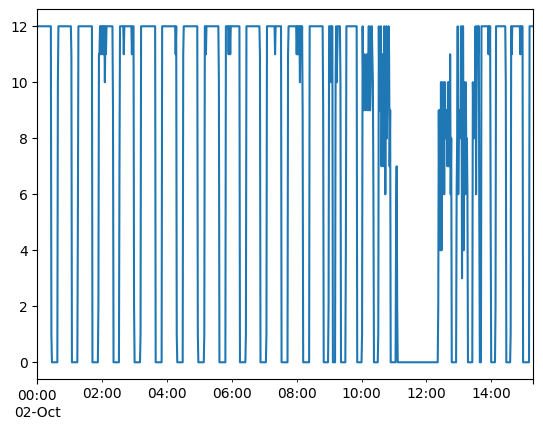

In [19]:
heartbeats_1min_range.loc['2023-10-02T00:00:00.000':'2023-10-02T18:59:59.000'].plot()

In [24]:
# Total messages per time
timestamps_total = []

with open("./data/cleaned-ocpp-logs/log2.log", encoding='utf8') as fp:
  line = fp.readline()
  cnt = 1
  while line:
    line = fp.readline()
    
    if "OCPP v1.6" in line:
      l1 = line.split(" ")
      timestamp = l1[1]+"T"+l1[2]
      timestamp = timestamp.replace(",", ".")
      timestamps_total.append(datetime.fromisoformat(timestamp))

<Axes: >

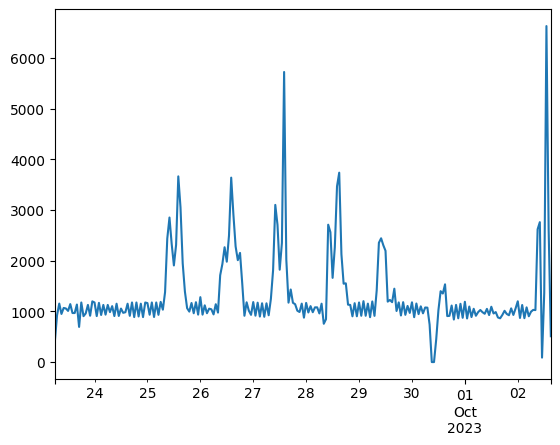

In [25]:
ts2 = pd.Series(np.ones(len(timestamps_total)), index=timestamps_total)

msgs_per_hour = ts2.resample("1H").sum()
msgs_per_hour.plot()

<Axes: >

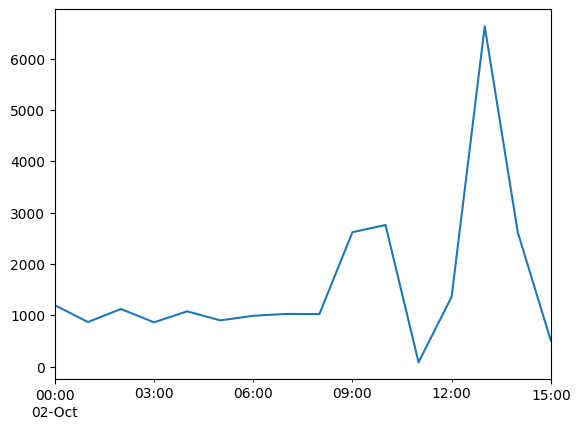

In [26]:
msgs_per_hour.loc['2023-10-02T00:00:00.000':'2023-10-02T18:59:59.000'].plot()

<Axes: >

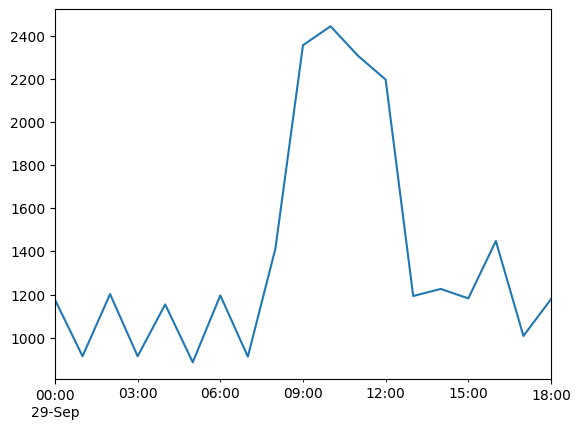

In [27]:
msgs_per_hour.loc['2023-09-29T00:00:00.000':'2023-09-29T18:59:59.000'].plot()

<Axes: >

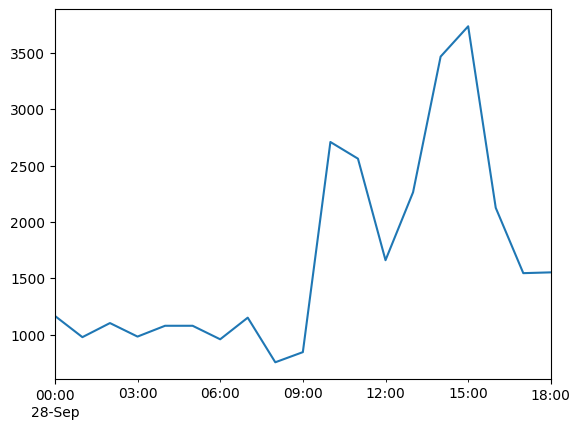

In [28]:
msgs_per_hour.loc['2023-09-28T00:00:00.000':'2023-09-28T18:59:59.000'].plot()